### Load Libraries

In [1]:
import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer


### Load Dataset

In [2]:
from data_preprocess import DataCollect

data_store = DataCollect('all_data.csv')
data_store.data

,userId,movieId,rating,timestamp,title,genres,Directors,Cast
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
2,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
3,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
4,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
...,...,...,...,...,...,...,...,...
201641,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",[Sion Sono],"[Joe Odagiri, Jai West, Motoki Fukami, Hiroyuk..."
201642,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201643,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201644,610,163981,3.5,1493850155,31 (2016),[Horror],[Rob Zombie],"[Sheri Moon Zombie, Jeff Daniel Phillips, Lawr..."


In [3]:
# Load data into notebook
all_data = data_store.data.copy()
all_data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
Directors     object
Cast          object
dtype: object

Sorting by timestamp

In [4]:
df_clean = all_data.copy()

In [5]:
from utils_movie_bias import filter_column_types

In [6]:
dir_encoded = filter_column_types(df_clean, 'Directors', 1000)
genres_encoded = filter_column_types(df_clean, 'genres', 1000)
cast_encoded = filter_column_types(df_clean, 'Cast', 1000)
# Concatenate the encoded columns with the original dataframe
movies_encoded = pd.concat([df_clean, genres_encoded, cast_encoded, dir_encoded], axis=1)
movies_encoded


,userId,movieId,rating,timestamp,title,genres,Directors,Cast,genres_Action,genres_Adventure,...,Directors_Richard Donner,Directors_Ridley Scott,Directors_Rob Reiner,Directors_Robert Zemeckis,Directors_Roland Emmerich,Directors_Ron Howard,Directors_Stanley Kubrick,Directors_Steven Spielberg,Directors_Terry Gilliam,Directors_Tim Burton
0,1.0,1.0,4.0,9.649827e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,4.0,9.649827e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,4.0,8.474350e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,1.0,4.0,8.474350e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,1.0,4.5,1.106636e+09,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Remove rows with NaN values
movies_encoded = movies_encoded.dropna()
movies_encoded

,userId,movieId,rating,timestamp,title,genres,Directors,Cast,genres_Action,genres_Adventure,...,Directors_Richard Donner,Directors_Ridley Scott,Directors_Rob Reiner,Directors_Robert Zemeckis,Directors_Roland Emmerich,Directors_Ron Howard,Directors_Stanley Kubrick,Directors_Steven Spielberg,Directors_Terry Gilliam,Directors_Tim Burton
0,1.0,1.0,4.0,9.649827e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,4.0,9.649827e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,4.0,8.474350e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,1.0,4.0,8.474350e+08,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,1.0,4.5,1.106636e+09,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201103,606.0,4395.0,4.0,1.171361e+09,Big Deal on Madonna Street (I Soliti Ignoti) (...,"[Comedy, Crime]",[Mario Monicelli],"[Vittorio Gassman, Renato Salvatori, Memmo Car...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201104,606.0,4615.0,4.0,1.171825e+09,Last Exit to Brooklyn (1989),[Drama],[Uli Edel],"[Stephen Lang, Jennifer Jason Leigh, Burt Youn...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201105,606.0,4615.0,4.0,1.171825e+09,Last Exit to Brooklyn (1989),[Drama],[Uli Edel],"[Stephen Lang, Jennifer Jason Leigh, Burt Youn...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201106,606.0,4653.0,3.0,1.209234e+09,"Return of the Musketeers, The (1989)","[Adventure, Comedy]",[Richard Lester],"[Michael York, Oliver Reed, Frank Finlay, C. T...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# sort the data by timestamp
movies_encoded = movies_encoded.sort_values('timestamp')
movies_encoded_sorted = movies_encoded.copy()

For each user, sorted according to timestamp and then train spilt on first 80% ratings

In [9]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
for user_id in set(movies_encoded_sorted['userId']):
  user_data = movies_encoded_sorted[movies_encoded_sorted['userId'] == user_id]
  num_movies = len(user_data)
  train_size = int(0.8 * num_movies)
  # Split into train and test data
  train = user_data[:train_size]
  test = user_data[train_size:]
  # A continuous index value will be maintained
  # across the rows in the new appended data frame.
  train_data = pd.concat([train_data, train], ignore_index = True)
  test_data = pd.concat([test_data, test], ignore_index = True)

train_data

,userId,movieId,rating,timestamp,title,genres,Directors,Cast,genres_Action,genres_Adventure,...,Directors_Richard Donner,Directors_Ridley Scott,Directors_Rob Reiner,Directors_Robert Zemeckis,Directors_Roland Emmerich,Directors_Ron Howard,Directors_Stanley Kubrick,Directors_Steven Spielberg,Directors_Terry Gilliam,Directors_Tim Burton
0,1.0,804.0,4.0,9.649805e+08,She's the One (1996),"[Comedy, Romance]",[Edward Burns],"[John Mahoney, Edward Burns, Michael McGlone, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1210.0,5.0,9.649805e+08,Star Wars: Episode VI - Return of the Jedi (1983),"[Action, Adventure, Sci-Fi]",[Richard Marquand],"[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1210.0,5.0,9.649805e+08,Star Wars: Episode VI - Return of the Jedi (1983),"[Action, Adventure, Sci-Fi]",[Richard Marquand],"[Mark Hamill, Harrison Ford, Carrie Fisher, Bi...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,804.0,4.0,9.649805e+08,She's the One (1996),"[Comedy, Romance]",[Edward Burns],"[John Mahoney, Edward Burns, Michael McGlone, ...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2826.0,4.0,9.649805e+08,"13th Warrior, The (1999)","[Action, Adventure, Fantasy]","[John McTiernan, Michael Crichton]","[Antonio Banderas, Diane Venora, Dennis Storhø...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160208,610.0,51927.0,3.5,1.493848e+09,Dead Silence (2007),"[Horror, Mystery, Thriller]",[James Wan],"[Ryan Kwanten, Amber Valletta, Donnie Wahlberg...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160209,610.0,99437.0,3.5,1.493848e+09,John Dies at the End (2012),"[Comedy, Fantasy, Horror]",[Don Coscarelli],"[Chase Williamson, Rob Mayes, Paul Giamatti, C...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
160210,610.0,99437.0,3.5,1.493848e+09,John Dies at the End (2012),"[Comedy, Fantasy, Horror]",[Don Coscarelli],"[Chase Williamson, Rob Mayes, Paul Giamatti, C...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
160211,610.0,58332.0,2.0,1.493848e+09,Diary of the Dead (2007),"[Horror, Sci-Fi]",[George A. Romero],"[Todd Schroeder, Laura de Carteret, Amy Lalond...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_df = train_data.copy()
test_df = test_data.copy()

Using a random forest to get feature importances

In [11]:
train_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres',
       'Directors', 'Cast', 'genres_Action', 'genres_Adventure',
       ...
       'Directors_Richard Donner', 'Directors_Ridley Scott',
       'Directors_Rob Reiner', 'Directors_Robert Zemeckis',
       'Directors_Roland Emmerich', 'Directors_Ron Howard',
       'Directors_Stanley Kubrick', 'Directors_Steven Spielberg',
       'Directors_Terry Gilliam', 'Directors_Tim Burton'],
      dtype='object', length=957)

### MLP model for rating prediction

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

##### Initialise HyperParams

In [14]:
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
learning_rate=0.01
epochs=100

##### Modular Code

In [51]:
from MLP import train_and_evaluate_all_users, predict_without_dimension, grid_search_best_model

ImportError: cannot import name 'predict_without_dimension' from 'MLP' (/Users/pk/Documents/CSE293-MovieBias/MLP.py)

In [52]:
# Define the parameter grid for grid search
param_grid = {
    'hidden_size1': [64, 128],
    'hidden_size2': [32, 64],
    'hidden_size3': [16, 32],
    'learning_rate': [0.001, 0.01],
    'epochs': [1000, 1500]
}

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import MLP

X_train, y_train, X_test, y_test = MLP.preprocess_data(train_df, test_df)
# Perform grid search
model = MLP.MLP(X_train.shape[1], 64, 32, 16, 1)  # Initialize the base model
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model(X_test).squeeze()
mse = mean_squared_error(y_test, y_pred)

print("Best Model:", best_model)
print("Best Hyperparameters:", best_params)
print("MSE on Test Set:", mse)

TypeError: estimator should be an estimator implementing 'fit' method, MLP(
  (fc1): Linear(in_features=949, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
) was passed

In [17]:
all_predictions = train_and_evaluate_all_users(train_df, test_df, epochs=1500)
all_predictions

,userId,mse
0,1.0,1.827803
1,2.0,5.316149
2,3.0,1.543732
3,4.0,2.200025
4,5.0,4.805194
...,...,...
605,606.0,1.523643
606,607.0,1.580635
607,608.0,3.019100
608,609.0,0.839326


In [19]:
all_predictions_wo_genre = predict_without_dimension('genres', test_df, train_df, epochs = 1500)
all_predictions_wo_cast = predict_without_dimension('Cast', test_df, train_df, epochs = 1500)
all_predictions_wo_dir = predict_without_dimension('Directors', test_df, train_df, epochs = 1500)


In [20]:
# rename joining columns
all_predictions_wo_genre = all_predictions_wo_genre.rename(columns={'mse': 'mse_wo_genre'})
all_predictions_wo_cast = all_predictions_wo_cast.rename(columns={'mse': 'mse_wo_cast'})
all_predictions_wo_dir = all_predictions_wo_dir.rename(columns={'mse': 'mse_wo_dir'})
# join dataframes on a user column
all_predictions = pd.merge(all_predictions, all_predictions_wo_genre, on='userId')
all_predictions = pd.merge(all_predictions, all_predictions_wo_cast, on='userId')
all_predictions = pd.merge(all_predictions, all_predictions_wo_dir, on='userId')
all_predictions

,userId,mse,mse_wo_genre,mse_wo_cast,mse_wo_dir
0,1.0,1.827803,1.702075,2.190447,1.825231
1,2.0,5.316149,2.091780,3.593328,5.075494
2,3.0,1.543732,1.427536,2.346136,1.539712
3,4.0,2.200025,1.610758,2.213096,2.514278
4,5.0,4.805194,2.653930,4.647294,5.647633
...,...,...,...,...,...
605,606.0,1.523643,1.245523,1.209921,1.964904
606,607.0,1.580635,1.315978,1.615391,1.895481
607,608.0,3.019100,2.032799,1.929377,2.667919
608,609.0,0.839326,0.129261,0.029100,0.679760


In [ ]:
# Save the result to a CSV file
all_predictions.to_csv('/results/rate/predictions_mlp.csv', index=False, float_format='%.2f')
print("done")

### Boosting and Regression

In [23]:
def preprocess_data(train_df, test_df):
    X_train = train_df.drop(['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast'], axis=1)
    y_train = train_df['rating']
    X_test = test_df.drop(['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast'], axis=1)
    y_test = test_df['rating']
    return X_train, y_train, X_test, y_test

def grid_search_train_model(model_name, param_grid, X_train, y_train, X_test, y_test):
    model = GridSearchCV(model_name(), param_grid)
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    mse_model = mean_squared_error(y_test, y_pred_model)
    best_params_model = model.best_params_
    return mse_model, best_params_model

def fit_model(model, X_train, y_train, X_test, y_test):
    # Create a new model
    model_best = model()
    # Train the new model
    model_best.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model_best.predict(X_test))
    return mse
    
def predict_without_dimension(model_name, dim, X_train, X_test, y_train, y_test):
    X_train_wo_dim = X_train.drop(test_df.filter(regex=dim+'_').columns, axis=1)
    X_test_wo_dim = X_test.drop(train_df.filter(regex=dim+'_').columns, axis=1)
    # Create a new model
    model_best = model_name()
    # Train the new model
    model_best.fit(X_train_wo_dim, y_train)
    mse_wo_dim = mean_squared_error(y_test, model_best.predict(X_test_wo_dim))
    return mse_wo_dim

In [45]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

# Define the parameter grid for GradientBoostingRegressor
gb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.1, 0.5]
}

# Define the parameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 7]
}

# Define the parameter grid for SGDRegressor
sgd_param_grid = {
    'alpha': [0.001, 0.01],
    'max_iter': [1000, 1500]
}

xgb_param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001]}

knn_param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}


mlpregressor_param_grid = {'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],
                          'activation': ['relu', 'tanh'],
                          'learning_rate': ['constant', 'adaptive']}

svr_param_grid = {'kernel': ['linear', 'rbf', 'poly'],
                  'C': [0.1, 1, 10],
                  'epsilon': [0.01, 0.1, 1]}

lasso_param_grid = {'alpha': [0.1, 1, 10],
                    'selection': ['cyclic', 'random']}
# Define the models to be run
models = [
    (GradientBoostingRegressor, gb_param_grid),
    (RandomForestRegressor, rf_param_grid),
    (SGDRegressor, sgd_param_grid),
    (KNeighborsRegressor, knn_param_grid),
    (XGBRegressor, xgb_param_grid), 
    (MLPRegressor, mlpregressor_param_grid), 
    (SVR, svr_param_grid),
]

In [22]:
def find_best_model(train_df, test_df, models):
    X_train, y_train, X_test, y_test = preprocess_data(train_df, test_df)
    best_param_dict = {}
    # GridSearchCV
    for model, param_grid in models:
        print(model, param_grid)
        mse_model, best_params_model = grid_search_train_model(model, param_grid, X_train, y_train, X_test, y_test)
        model_name = f"{model.__name__}"
        print(model_name, mse_model)
        best_param_dict[model_name] = best_params_model
    return best_param_dict

In [17]:
user_counts = movies_encoded_sorted['userId'].value_counts()
list(user_counts.index[:100])[0]

414.0

In [46]:
def models_rate_predict(train_df, test_df, models, user_counts, no_of_users = 100):
    # create an empty dictionary
    all_predictions = {}
    for user in list(user_counts.index[:no_of_users]): #set(train_df['userId']):
        user_train_data = train_df[train_df['userId'] == user]
        user_test_data = test_df[test_df['userId'] == user]

        if len(user_train_data) == 0 or len(user_test_data)==0:
            continue # skip if user has no ratings
        X_train, y_train, X_test, y_test = preprocess_data(user_train_data, user_test_data)
        # using the best model from best param dict
        for model, _ in models:
            # Create a unique name for the dataframe based on the model
            model_name = model.__name__
            df_name = f"predictions_{model_name}"
            mse_model = fit_model(model, X_train, y_train, X_test, y_test)
            if df_name in all_predictions:
                all_predictions[df_name] = pd.concat([all_predictions[df_name], pd.DataFrame({'userId': [user], 'mse': [mse_model]})], ignore_index=True)
            else:
                all_predictions[df_name] = pd.DataFrame({'userId': [user], 'mse': [mse_model]})
            for dim in ['genres', 'Cast', 'Directors']:
                mse_wo_dim = predict_without_dimension(model, dim, X_train, X_test, y_train, y_test)
                # Add the new column for the user
                all_predictions[df_name].loc[all_predictions[df_name]['userId'] == user, 'mse_wo_'+dim] = mse_wo_dim
    return all_predictions

all_predictions_boosting = models_rate_predict(train_df, test_df, models, user_counts, 100)

In [111]:
all_predictions_boosting['predictions_GradientBoostingRegressor']

,userId,mse,mse_wo_genres,mse_wo_Cast,mse_wo_Directors
0,414.0,0.626513,0.635919,0.628943,0.629562
1,599.0,0.848612,0.849643,0.854574,0.853244
2,474.0,0.320344,0.320492,0.328599,0.322208
3,448.0,1.220393,1.203814,1.166410,1.209295
4,274.0,0.440332,0.435290,0.369111,0.442948
...,...,...,...,...,...
95,63.0,0.882612,0.918519,0.912372,0.923917
96,325.0,0.853838,0.782612,0.933369,0.803350
97,169.0,0.480760,0.446329,0.548237,0.478205
98,290.0,0.641790,0.658780,0.742455,0.679703


In [49]:
for predictions_model in all_predictions_boosting.keys():
    # Save the results to a CSV file
    all_predictions_boosting[predictions_model].to_csv('./results/rate/'+predictions_model+'.csv', index=False) #, float_format='%.4f')
print("done")

done


#### Watch Predictions

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define the parameter grids for each model
param_grid_lr = {'C': [0.1, 1.0]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 7]}
param_grid_svm = {'C': [0.1, 1.0], 'kernel': ['linear', 'rbf']}
param_grid_mlp = {'hidden_layer_sizes': [(64,), (64, 32), (32,)]}
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.5]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_nb = {}  # No specific parameters for Gaussian Naive Bayes
param_grid_dt = {'max_depth': [3, 5, 7]}
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1.0]}

# Define the models to be run
models_watch = [
    (GradientBoostingClassifier, param_grid_gb),
    (MLPClassifier, param_grid_mlp),
    (SVC, param_grid_svm),
    (RandomForestClassifier, param_grid_rf),
    (LogisticRegression, param_grid_lr),
    (KNeighborsClassifier, param_grid_knn),
    (GaussianNB, param_grid_nb),
    (DecisionTreeClassifier, param_grid_dt),
    (XGBClassifier, param_grid_xgb),
]

##### Creating "watch" column based on movies enjoyed with a threshold rating

In [25]:
# Create the watch column based on the threshold rating
threshold_rating = 3.5
train_df['watch'] = train_df['rating'] >= threshold_rating
# Convert the boolean values to 1 and 0
train_df['watch'] = train_df['watch'].astype(int)
test_df['watch'] = test_df['rating'] >= threshold_rating
test_df['watch'] = test_df['watch'].astype(int)

In [27]:
def preprocess_data_watch(train_df, test_df):
    X_train = train_df.drop(['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast'], axis=1)
    y_train = train_df['watch']
    X_test = test_df.drop(['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast'], axis=1)
    y_test = test_df['watch']
    return X_train, y_train, X_test, y_test

##### Grid Search for watching

In [ ]:
def find_best_model(train_df, test_df, models):
    X_train, y_train, X_test, y_test = preprocess_data_watch(train_df, test_df)
    best_param_dict = {}
    # GridSearchCV
    for model, param_grid in models_watch:
        print(model, param_grid)
        mse_model, best_params_model = grid_search_train_model(model, param_grid, X_train, y_train, X_test, y_test)
        model_name = f"{model.__name__}"
        print(model_name, mse_model)
        best_param_dict[model_name] = best_params_model
    return best_param_dict

In [36]:
def classify_watch_predictions(train_df, test_df, models, user_counts, no_of_users = 100):
    # create an empty dictionary
    all_predictions_watch = {}
    for user in list(user_counts.index[:no_of_users]): #set(train_df['userId']):
        user_train_data = train_df[train_df['userId'] == user]
        user_test_data = test_df[test_df['userId'] == user]
        
        if len(user_train_data) == 0 or len(user_test_data)==0:
            continue # skip if user has no ratings
    
        X_train, y_train, X_test, y_test = preprocess_data_watch(user_train_data, user_test_data)

       # using the best model from best param dict
        for model, _ in models:
            # Create a unique name for the dataframe based on the model
            model_name = model.__name__
            df_name = f"predictions_{model_name}"
            mse_model = fit_model(model, X_train, y_train, X_test, y_test)
            if df_name in all_predictions_watch:
                all_predictions_watch[df_name] = pd.concat([all_predictions_watch[df_name], pd.DataFrame({'userId': [user], 'mse': [mse_model]})], ignore_index=True)
            else:
                all_predictions_watch[df_name] = pd.DataFrame({'userId': [user], 'mse': [mse_model]})
            for dim in ['genres', 'Cast', 'Directors']:
                mse_wo_dim = predict_without_dimension(model, dim, X_train, X_test, y_train, y_test)
                # Add the new column for the user
                all_predictions_watch[df_name].loc[all_predictions_watch[df_name]['userId'] == user, 'mse_wo_'+dim] = mse_wo_dim

    return all_predictions_watch

all_predictions_watch = classify_watch_predictions(train_df, test_df, models_watch, user_counts, 100)

In [38]:
for predictions_model in all_predictions_watch.keys():
    # Save the results to a CSV file
    all_predictions_watch[predictions_model].to_csv('./results/watch/'+predictions_model+'.csv', index=False)#, float_format='%.5f')
print("done")

done


## Comparing all predictions

In [31]:
# Find the column with the highest MSE - hence most affect
min_mse_col = all_predictions[['mse_wo_genre', 'mse_wo_cast', 'mse_wo_dir']].idxmax(axis=1)

# Create a new column indicating which feature had the highest impact on MSE
all_predictions['highest_impact_mlp'] = min_mse_col.apply(lambda x: 'genres' if x == 'mse_wo_genre' else ('Cast' if x == 'mse_wo_cast' else 'Directors'))
# convert the 'userId' column from float to int
all_predictions['userId'] = all_predictions['userId'].astype(int)
all_predictions

,userId,mse,mse_wo_genre,mse_wo_cast,mse_wo_dir,highest_impact_mlp
0,1,1.827803,1.702075,2.190447,1.825231,Cast
1,2,5.316149,2.091780,3.593328,5.075494,Directors
2,3,1.543732,1.427536,2.346136,1.539712,Cast
3,4,2.200025,1.610758,2.213096,2.514278,Directors
4,5,4.805194,2.653930,4.647294,5.647633,Directors
...,...,...,...,...,...,...
605,606,1.523643,1.245523,1.209921,1.964904,Directors
606,607,1.580635,1.315978,1.615391,1.895481,Directors
607,608,3.019100,2.032799,1.929377,2.667919,Directors
608,609,0.839326,0.129261,0.029100,0.679760,Directors


### Comparision with the baseline

In [32]:
# Read the CSV file into a DataFrame
predictions_baseline = pd.read_csv('predictions_baseline.csv') 
predictions_baseline.dtypes

userId                          int64
genresWatchBias                object
genresRateBias                 object
CastWatchBias                  object
CastRateBias                   object
DirectorsWatchBias             object
DirectorsRateBias              object
watch_bias_dimension_score    float64
rate_bias_dimension_score     float64
rate_affecting_dim             object
watch_affecting_dim            object
dtype: object

#### Visualisations

In [130]:
# drop unwanted columns from mlp and baseline dataframes
mlp = all_predictions[['userId', 'highest_impact']]
baseline = predictions_baseline[['userId', 'rate_affecting_dim']]
mlp = mlp.rename(columns={'highest_impact': 'most_affecting_dimension'})
baseline = baseline.rename(columns={'rate_affecting_dim': 'most_affecting_dimension'})

In [157]:
baseline_watched = predictions_baseline[['userId', 'watch_affecting_dim']]
baseline_watched = baseline_watched.rename(columns={'watch_affecting_dim': 'most_affecting_dimension'})

In [158]:
import seaborn as sns

# create a merged dataframe with the most affecting dimension from both models
merged_df = pd.merge(mlp, baseline, on='userId', suffixes=('_mlp', '_baseline'))
merged_df_watched = pd.merge(mlp, baseline_watched, on='userId', suffixes=('_mlp', '_baseline'))

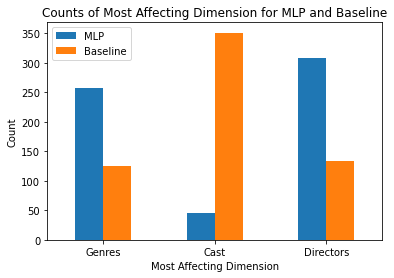

In [137]:
# create a dataframe with counts of each category for mlp and baseline
counts_df = pd.DataFrame({'MLP': mlp['most_affecting_dimension'].value_counts(), 'Baseline': baseline['most_affecting_dimension'].value_counts()}).fillna(0)

# plot the bar chart
ax = counts_df.plot(kind='bar')
ax.set_xticklabels(['Genres', 'Cast', 'Directors'], rotation=0)
plt.title('Counts of Most Affecting Dimension for MLP and Baseline')
plt.xlabel('Most Affecting Dimension')
plt.ylabel('Count')
plt.show()

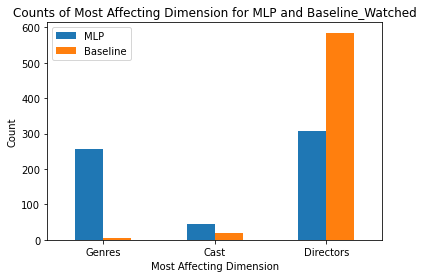

In [159]:
# create a dataframe with counts of each category for mlp and baseline
counts_df = pd.DataFrame({'MLP': mlp['most_affecting_dimension'].value_counts(), 'Baseline': baseline_watched['most_affecting_dimension'].value_counts()}).fillna(0)

# plot the bar chart
ax = counts_df.plot(kind='bar')
ax.set_xticklabels(['Genres', 'Cast', 'Directors'], rotation=0)
plt.title('Counts of Most Affecting Dimension for MLP and Baseline_Watched')
plt.xlabel('Most Affecting Dimension')
plt.ylabel('Count')
plt.show()

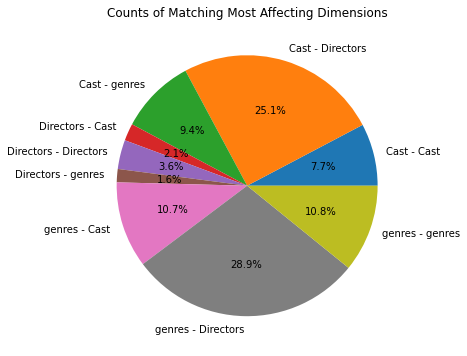

In [134]:
# Plot the pie chart showing how many rows have the same most affecting dimension for both MLP and baseline models
counts = merged_df.groupby(['most_affecting_dimension_mlp', 'most_affecting_dimension_baseline']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(counts['count'], labels=counts['most_affecting_dimension_mlp'] + ' - ' + counts['most_affecting_dimension_baseline'], autopct='%1.1f%%')
ax.set_title('Counts of Matching Most Affecting Dimensions MLP-Baseline')
plt.show()

#### Extracting results of 100 most watched users

In [149]:
user_counts = movies_encoded_sorted['userId'].value_counts()
user_counts.index[:50]

Index([414.0, 599.0, 474.0, 448.0, 274.0,  68.0, 380.0, 610.0, 288.0, 249.0,
       387.0, 606.0, 182.0, 307.0, 603.0, 298.0, 177.0, 232.0, 318.0, 480.0,
       608.0, 600.0, 590.0, 483.0,  19.0, 105.0, 305.0, 489.0, 111.0, 438.0,
       217.0, 140.0, 477.0, 555.0,  91.0,  28.0, 219.0,  64.0, 534.0,  89.0,
       226.0, 561.0,  18.0, 525.0,  57.0, 381.0, 368.0, 469.0, 509.0, 560.0],
      dtype='float64', name='userId')

In [156]:
user_id = 414
user_movies = movies_encoded_sorted[movies_encoded_sorted['userId'] == user_id]

# Find most watched director
directors = user_movies['Directors'].explode().value_counts()
print("Most watched Director for user ", user_id, ": ", directors.index[0], ", Count : ", directors.iloc[0])

# Find most watched actor
actors = user_movies['Cast'].explode().value_counts()
print("Most watched Cast for user ", user_id, ": ", actors.index[0], ", Count : ", actors.iloc[0])

# Find most watched genre
genres = user_movies['genres'].explode().value_counts()
print("Most watched Genre for user ", user_id, ": ", genres.index[0], ", Count : ", genres.iloc[0])

# Find most rated director
director_ratings = user_movies.explode('Directors').groupby('Directors')['rating'].mean()
print("Most rated Director for user ", user_id, ": ", director_ratings.idxmax(), ", Count : ", director_ratings.max())

# Find most rated actor
actor_ratings = user_movies.explode('Cast').groupby('Cast')['rating'].mean()
print("Most rated Cast for user ", user_id, ": ", actor_ratings.idxmax(), ", Count : ", actor_ratings.max())

# Find most rated genre
genre_ratings = user_movies.explode('genres').groupby('genres')['rating'].mean()
print("Most rated Genre for user ", user_id, ": ", genre_ratings.idxmax(), ", Count : ", genre_ratings.max())


Most watched Director for user  414 :  Steven Spielberg , Count :  46
Most watched Cast for user  414 :  Arnold Montey , Count :  110
Most watched Genre for user  414 :  Drama , Count :  2608
Most rated Director for user  414 :  Ash Brannon , Count :  5.0
Most rated Cast for user  414 :  'Chico' Hernandez , Count :  5.0
Most rated Genre for user  414 :  (no genres listed) , Count :  4.5


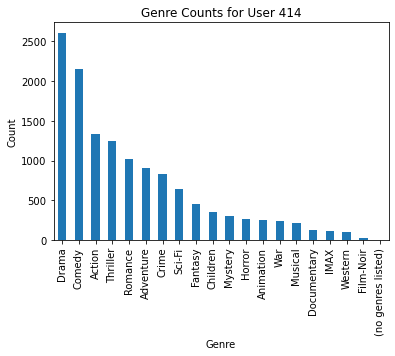

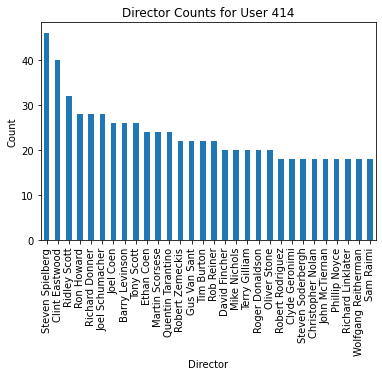

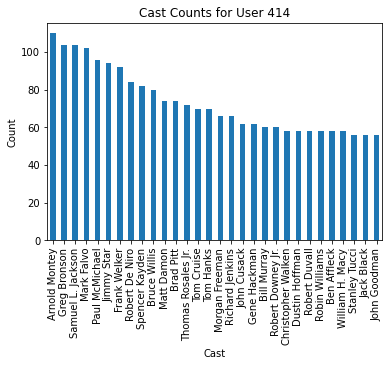

In [161]:
import matplotlib.pyplot as plt

# Plot the counts of each genre
genres.plot(kind='bar')
plt.title('Genre Counts for User {}'.format(user_id))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Plot the counts of each director
directors[:30].plot(kind='bar')
plt.title('Director Counts for User {}'.format(user_id))
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

# Plot the counts of each cast member
actors[:30].plot(kind='bar')
plt.title('Cast Counts for User {}'.format(user_id))
plt.xlabel('Cast')
plt.ylabel('Count')
plt.show()


In [163]:
predictions_baseline[predictions_baseline['userId']==414]

,userId,genresWatchBias,genresRateBias,CastWatchBias,CastRateBias,DirectorsWatchBias,DirectorsRateBias,watch_bias_dimension_score,rate_bias_dimension_score,rate_affecting_dim,watch_affecting_dim
146,414,"('Drama', -0.919992631821885)","('Film-Noir', 0.38272074121875366)","('Arnold Montey', -0.8630154661372952)","('David Steen', 5.845513239902907)","('Steven Spielberg', -0.9934244736798449)","('Kenneth Lonergan', 5.701375445280118)",-0.873423,0.270372,Directors,Cast


In [173]:
all_predictions[all_predictions['userId']==414]

,userId,mse,mse_wo_genre,mse_wo_cast,mse_wo_dir,highest_impact
413,414,1.885084,1.335196,0.951179,2.149652,Cast


: 

#### Collaborative filtering

In [168]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item matrix from the training set
user_item_matrix = train_df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0.0)

# Compute item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)
np.fill_diagonal(item_similarity, 0)  # set diagonal values to 0
item_similarity


array([[0.        , 0.4086913 , 0.31536362, ..., 0.        , 0.        ,
        0.        ],
       [0.4086913 , 0.        , 0.24584064, ..., 0.        , 0.        ,
        0.        ],
       [0.31536362, 0.24584064, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [172]:
# Get the user-item ratings from the test set
test_ratings = test_df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0.0)

# Initialize an empty array to store the predicted ratings
predicted_ratings = np.zeros(test_ratings.shape)

# Loop over each user-item pair in the test set
for i, userId in enumerate(test_ratings.index):
    for j, movieId in enumerate(test_ratings.columns):
        # Get the user and item vectors
        user_vector = user_item_matrix.loc[userId].values.reshape(1, -1)
        movie_vector = user_item_matrix[movieId].values.reshape(-1, 1)
        
        # Compute the predicted rating using item-item similarity and user-item ratings
        predicted_rating = (user_vector @ item_similarity @ movie_vector).item()
        
        # Set the predicted rating to 5 if it's greater than 5
        if predicted_rating > 5:
            predicted_rating = 5
        
        # Set the predicted rating to 0 if it's less than 0
        if predicted_rating < 0:
            predicted_rating = 0
        
        # Save the predicted rating
        predicted_ratings[i, j] = predicted_rating

# Compute the mean squared error (MSE) between the predicted and actual ratings
mse = ((test_ratings - predicted_ratings) ** 2).mean().mean()

print("MSE:", mse)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 610 is different from 7971)

#### Random Forest Regressor

In [17]:
# Train a random forest regressor to predict movie ratings
features = [col for col in train_df.columns if col not in ['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast']]
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_df[features], train_df['rating'])

# Calculate feature importance scores
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the features by importance score
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features by importance score
print(feature_importances.head(10))
# training fro each user, finding feature importances

                feature  importance
5         genres_Comedy    0.015109
15       genres_Romance    0.014672
6          genres_Crime    0.013715
1         genres_Action    0.013502
689  Cast_Peter Diamond    0.012617
17      genres_Thriller    0.012567
8          genres_Drama    0.012158
65   Cast_Arnold Montey    0.009943
2      genres_Adventure    0.009078
16        genres_Sci-Fi    0.008742


In [75]:
def train_model(X_train, y_train, n_est):
    # Train a Random Forest Regressor on the training data
    rf_regressor = RandomForestRegressor(n_estimators=n_est, random_state=42)
    rf_regressor.fit(X_train, y_train)
    return rf_regressor

##### For testing the accuracy of the model

In [54]:
# create a model for calculating the accuracy of based on the test set predictions and actual ratings
def test_model(model, X_test, y_test):
    # Predict the ratings using the trained model
    y_pred = model.predict(X_test)
    # Round off the predicted ratings to 2 decimal places
    y_pred = np.round(y_pred, 2)
    # Convert y_pred to a pandas Series
    y_pred = pd.Series(y_pred, index=y_test.index)
    # Calculate and return the accuracy of the model
    mse = mean_squared_error(y_test, y_pred)
    # for accuracy score, continuous variables req
    accuracy = accuracy_score(pd.Series(np.round(y_test), index=y_test.index), pd.Series(np.round(y_pred), index=y_test.index))
    return y_pred, mse, accuracy

1. Containing all the dimensions

In [57]:
features = [col for col in train_df.columns if col not in ['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast']]
rf = train_model(train_df[features], train_df['rating'], 100)
test_pred, mse_all, accuracy_all = test_model(rf, test_df[features], test_df['rating'])
print("MSE when including all dimensions (basically MSE of our model) : ", mse_all)
print("Accuracy when including all dimensions (basically accuracy of our model) : ", accuracy_all)

MSE when including all dimensions (basically MSE of our model) :  1.0726240751294696
Accuracy when including all dimensions (basically accuracy of our model) :  0.3984438882969497


2. Testing certain dimensions to get the most affected dimension

    *wo : wo in following section means without a particular dimension*

In [76]:
test_wo_genre = test_df.drop(test_df.filter(regex='genres_').columns, axis=1)
train_wo_genre = train_df.drop(train_df.filter(regex='genres_').columns, axis=1)
features = [col for col in test_wo_genre.columns if col not in ['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast']]
rf_wo_genre = train_model(train_wo_genre[features], train_wo_genre['rating'], 100)
test_pred_wo_genre, mse_wo_genre, accuracy_wo_genre = test_model(rf_wo_genre, test_wo_genre[features], test_wo_genre['rating'])
print("MSE without 'genre': ", mse_wo_genre)
print("Accuracy without 'genre': ", accuracy_wo_genre)

MSE without 'genre':  1.0751836979953913
Accuracy without 'genre':  0.3883341179968779


In [77]:
test_wo_cast = test_df.drop(test_df.filter(regex='Cast_').columns, axis=1)
train_wo_cast = train_df.drop(train_df.filter(regex='Cast_').columns, axis=1)
features = [col for col in test_wo_cast.columns if col not in ['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast']]
rf_wo_cast = train_model(train_wo_cast[features], train_wo_cast['rating'], 100)
test_pred_wo_cast, mse_wo_cast, accuracy_wo_cast = test_model(rf_wo_cast, test_wo_cast[features], test_wo_cast['rating'])
print("MSE without 'Cast': ", mse_wo_cast)
print("Accuracy without 'Cast': ", accuracy_wo_cast)

MSE without 'Cast':  1.075728371781847
Accuracy without 'Cast':  0.350769383254454


In [78]:
test_wo_dir = test_df.drop(test_df.filter(regex='Directors_').columns, axis=1)
train_wo_dir = train_df.drop(train_df.filter(regex='Directors_').columns, axis=1)
features = [col for col in test_wo_dir.columns if col not in ['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast']]
rf_wo_dir = train_model(train_wo_dir[features], train_wo_dir['rating'], 100)
test_pred_wo_dir, mse_wo_dir, accuracy_wo_dir = test_model(rf_wo_dir, test_wo_dir[features], test_wo_dir['rating'])
print("MSE without 'Directors': ", mse_wo_dir)
print("Accuracy without 'Directors': ", accuracy_wo_dir)

MSE without 'Directors':  1.0739032782416928
Accuracy without 'Directors':  0.40017840771117774


In [19]:
weights_len = data.drop(['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast'], axis=1).shape[1]

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

# Define the MSE loss function
criterion = nn.MSELoss()

# Define the logistic regression model and optimizer
model = LogisticRegression(weights_len)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model using the movie data
epochs = 1000
for epoch in range(epochs):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Get the input and target data
    x_data = torch.tensor(data.drop(['userId', 'movieId', 'timestamp', 'rating', 'title', 'genres', 'Directors', 'Cast'], axis=1).values, dtype=torch.float32)
    y_data = torch.tensor(data['rating'].values, dtype=torch.float32).view(-1, 1)
    
    # Get the predictions and calculate the loss
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    
    # Print the loss every 50 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")
    
    # Backpropagate and update the weights
    loss.backward()
    optimizer.step()

# Get the learned weights
weights = list(model.parameters())[0].detach().numpy().flatten()

# Print the learned weights
print(f"Learned weights: {weights}")


Epoch 0: loss = 10.103165626525879
Epoch 10: loss = 9.72164249420166
Epoch 20: loss = 9.37899112701416
Epoch 30: loss = 9.086501121520996
Epoch 40: loss = 8.844478607177734
Epoch 50: loss = 8.647102355957031
Epoch 60: loss = 8.486624717712402
Epoch 70: loss = 8.355635643005371
Epoch 80: loss = 8.247894287109375
Epoch 90: loss = 8.158438682556152
Epoch 100: loss = 8.083425521850586
Epoch 110: loss = 8.019902229309082
Epoch 120: loss = 7.965599060058594
Epoch 130: loss = 7.918770790100098
Epoch 140: loss = 7.878055572509766
Epoch 150: loss = 7.8423895835876465
Epoch 160: loss = 7.8109307289123535
Epoch 170: loss = 7.7830047607421875
Epoch 180: loss = 7.758070945739746
Epoch 190: loss = 7.735690593719482
Epoch 200: loss = 7.715502738952637
Epoch 210: loss = 7.697209358215332
Epoch 220: loss = 7.680562496185303
Epoch 230: loss = 7.665356636047363
Epoch 240: loss = 7.651416778564453
Epoch 250: loss = 7.638593673706055
Epoch 260: loss = 7.6267619132995605
Epoch 270: loss = 7.615814208984375


Idea to remove the least watched movies per user, too memory intensive, unable to complete without memory limit error

In [19]:
# Define a function to remove least frequently watched cast members per user
def remove_least_watched_fetaures(feature, df, to_keep_denominator = 2):
    df_copy = df.copy()
    for user in df_copy['userId'].unique():
        # Get the cast members watched by the user
        user_feature = df_copy.loc[df_copy['userId'] == user, feature]
        # Count the number of times each cast member was watched
        feature_counts = user_feature.explode().value_counts()
        # Get the number of cast members to keep
        num_feature_to_keep = len(cast_counts) // to_keep_denominator
        # Get the popular cast members based on the upper half of the cast counts
        popular_feature = cast_counts[:num_feature_to_keep].index.tolist()    
        # Remove the least frequently watched feature members
        df_copy.loc[df_copy['userId'] == user, feature] = user_feature.apply(lambda x: [c for c in x if c in popular_feature])
    return df_copy

Feature hashin technique, loose info about what we're predicting, difficult to understand

In [16]:
from sklearn.feature_extraction import FeatureHasher

hasher = FeatureHasher(n_features=5, input_type='string')
hashed_genres = hasher.transform(train_df['genres'])
hashed_cast = hasher.transform(train_df['Cast'])
hashed_directors = hasher.transform(train_df['Directors'])


In [18]:
hashed_genres.toarray()

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0., -1.],
       ...,
       [ 1.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0., -1.],
       [ 1.,  0.,  0.,  0., -1.]])

In [19]:
# Concatenate the hashed features with the numerical features
X = pd.concat([pd.DataFrame(hashed_genres.toarray()), pd.DataFrame(hashed_cast.toarray()), pd.DataFrame(hashed_directors.toarray()), train_df[['userId', 'movieId', 'timestamp']]], axis=1)

X

,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,userId,movieId,timestamp
0,0.0,0.0,0.0,0.0,1.0,-8.0,5.0,9.0,0.0,-7.0,0.0,1.0,0.0,0.0,0.0,1,1210,964980499
1,0.0,0.0,0.0,0.0,1.0,-8.0,5.0,9.0,0.0,-7.0,0.0,1.0,0.0,0.0,0.0,1,1210,964980499
2,0.0,1.0,0.0,0.0,-1.0,1.0,1.0,-5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1,804,964980499
3,0.0,1.0,0.0,0.0,-1.0,1.0,1.0,-5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1,804,964980499
4,0.0,-1.0,0.0,0.0,2.0,4.0,0.0,-1.0,-1.0,-5.0,0.0,0.0,0.0,0.0,0.0,1,2826,964980523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160639,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,-1.0,0.0,0.0,0.0,0.0,610,51666,1493848680
160640,1.0,1.0,0.0,1.0,0.0,0.0,-5.0,-1.0,2.0,-1.0,0.0,0.0,0.0,0.0,1.0,610,112727,1493848682
160641,1.0,1.0,0.0,1.0,0.0,0.0,-5.0,-1.0,2.0,-1.0,0.0,0.0,0.0,0.0,1.0,610,112727,1493848682
160642,1.0,0.0,0.0,0.0,-1.0,-3.0,-1.0,-1.0,3.0,3.0,0.0,0.0,0.0,-1.0,0.0,610,71732,1493848688


MultiLabelBinarizer technique - Memory limit exceeded, also, will lead to sparse data

Suggestion - remove the values which occurs very less

In [ ]:
# Apply one-hot encoding on genres
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(train_data['genres']), columns='genres_'+mlb.classes_)

# Apply one-hot encoding on Cast
mlb = MultiLabelBinarizer()
cast_encoded = pd.DataFrame(mlb.fit_transform(train_data['Cast']), columns='cast_'+mlb.classes_)

# Apply one-hot encoding on Directors
mlb = MultiLabelBinarizer()
director_encoded = pd.DataFrame(mlb.fit_transform(train_data['Directors']), columns='director_'+mlb.classes_)

# Concatenate the encoded columns with the original dataframe
movies_encoded_train = pd.concat([train_data, genres_encoded, cast_encoded, director_encoded], axis=1)
movies_encoded_train

In [ ]:
# Encode genres using get_dummies
genres_df = pd.get_dummies(train_df['genres'].apply(pd.Series).stack(), prefix='genre').sum(level=0)
cast_df = pd.get_dummies(train_df['Cast'].apply(pd.Series).stack(), prefix='cast').sum(level=0)
directors_df = pd.get_dummies(train_df['Directors'].apply(pd.Series).stack(), prefix='director').sum(level=0)

movies_encoded_train = pd.concat([train_df.drop(['genres', 'Cast', 'Directors'], axis=1), genres_df, cast_df, directors_df], axis=1)
movies_encoded_train

<ipython-input-15-3b6fe5a14cd6>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_df = pd.get_dummies(train_df['genres'].apply(pd.Series).stack(), prefix='genre').sum(level=0)


In [60]:
train_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
Directors     object
Cast          object
dtype: object

In [54]:
train_data['rating']

0         5.0
1         5.0
2         4.0
3         4.0
4         4.0
         ... 
160639    2.0
160640    3.0
160641    3.0
160642    3.5
160643    3.5
Name: rating, Length: 160644, dtype: float64

In [ ]:

import category_encoders as ce
# Target encode the 'Directors' and 'Cast' columns
encoder = ce.TargetEncoder(cols=['Directors', 'Cast', 'genres'])
df_clean = encoder.fit_transform(df_clean, df_clean['rating'])
df_clean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.2 MB/s eta 0:00:00


TypeError: ignored

In [ ]:
# Convert list columns to string format
df_clean['genres'] = df_clean['genres'].apply(lambda x: ' '.join(x))
df_clean['Directors'] = df_clean['Directors'].apply(lambda x: ' '.join(x))
df_clean['Cast'] = df_clean['Cast'].apply(lambda x: ' '.join(x))

# One-hot encode the categorical features
df_clean = pd.get_dummies(df_clean, columns=['genres', 'Cast', 'Directors'])#, 
df_clean

,userId,movieId,rating,timestamp,title,genres_(no genres listed),genres_Action,genres_Action Adventure,genres_Action Adventure Animation,genres_Action Adventure Animation Children,...,Directors_Zoya Akhtar,Directors_Álex de la Iglesia,Directors_Çagan Irmak,Directors_Édouard Molinaro,Directors_Élie Chouraqui,Directors_Éléonore Faucher,Directors_Émile Gaudreault,Directors_Éric Lartigau,Directors_Éric Rohmer,Directors_Étienne Chatiliez
0,1,1,4.0,964982703,Toy Story (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4.0,964982703,Toy Story (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,4.0,847434962,Toy Story (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,4.0,847434962,Toy Story (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,4.5,1106635946,Toy Story (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201641,610,160836,3.0,1493844794,Hazard (2005),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201642,610,163937,3.5,1493848789,Blair Witch (2016),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201643,610,163937,3.5,1493848789,Blair Witch (2016),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201644,610,163981,3.5,1493850155,31 (2016),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
df_clean.dtypes

NameError: ignored

In [ ]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import LinearRegression


In [ ]:

# Convert the lists in Cast and Directors columns into sets
df_clean['genres'] = df_clean['genres'].apply(lambda x: set(x) if isinstance(x, list) else set())
df_clean['Directors'] = df_clean['Directors'].apply(lambda x: set(x) if isinstance(x, list) else set())
df_clean['Cast'] = df_clean['Cast'].apply(lambda x: set(x) if isinstance(x, list) else set())

df_clean
# df['genres'] = df['genres'].apply(set)
# df['Cast'] = df['Cast'].apply(set)
# df['Directors'] = df['Directors'].apply(set)

# Fit a MultiLabelBinarizer on the sets of values in Cast and Directors columns
mlb = MultiLabelBinarizer()
mlb.fit(df_clean['Cast'] | df_clean['Directors'] | df_clean['genres'])
# Transform the sets of values in Cast and Directors columns into binary features
cast_directors_features = pd.DataFrame(mlb.transform(df_clean['Cast'] | df_clean['Directors'] | df_clean['genres']), columns=mlb.classes_)

cast_directors_features
# import category_encoders as ce
# Target encode the 'Directors' and 'Cast' columns
# encoder = ce.TargetEncoder(cols=['Directors', 'Cast'])
# df = encoder.fit_transform(df, df['rating'])
# Convert list columns to string format
# df['genres'] = df['genres'].apply(lambda x: ' '.join(x) if not isinstance(x, list) else '')
# df['Directors'] = df['Directors'].apply(lambda x: ' '.join(x) if not isinstance(x, list) else '')
# df['Cast'] = df['Cast'].apply(lambda x: ' '.join(x) if not isinstance(x, list) else '')

# One-hot encode the categorical features
# df = pd.get_dummies(df, columns=['genres', 'Cast', 'Directors'])#, 
# df

TypeError: ignored

In [ ]:
df['genres_']

0         1
1         1
2         1
3         1
4         1
         ..
201641    1
201642    1
201643    1
201644    1
201645    1
Name: genres_, Length: 201646, dtype: uint8

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# One-hot encode the categorical features
df = pd.get_dummies(df, columns=['genre', 'cast', 'director'])

# Split the dataset into training and testing sets
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)

# Train a random forest regressor to predict movie ratings
features = [col for col in df.columns if col not in ['userId', 'movieId', 'timestamp', 'rating']]
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train[features], train['rating'])

# Calculate feature importance scores
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the features by importance score
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features by importance score
print(feature_importances.head(10))
